# Regresión Lineal Costo de un Incidente de Seguridad 

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionando con la CyberSeguridad.

### Enunciado del Ejercicio 

EL ejercicio consiste en predecir el csoto de un incidente de seguridad en base a número de equipos afectados. El conjunto de datos es generado de manera aleatoria. 


## 1.-Generación del DataSet

In [19]:
import numpy as np 


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X +np.random.randn(100, 1)

print("La Longitud del DataSet es: ",len(X))

La Longitud del DataSet es:  100


## 2.- Visualización del DataSet 

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

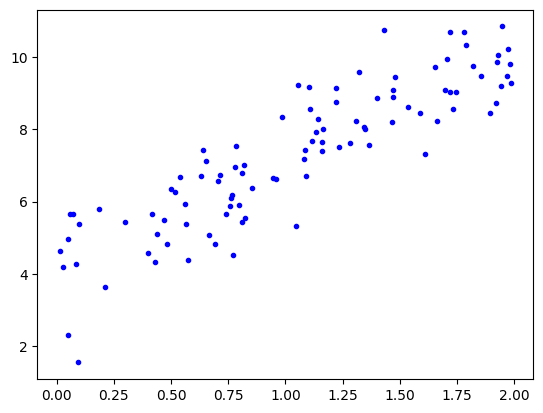

In [21]:
plt.plot(X,y, "b.")
plt.show()

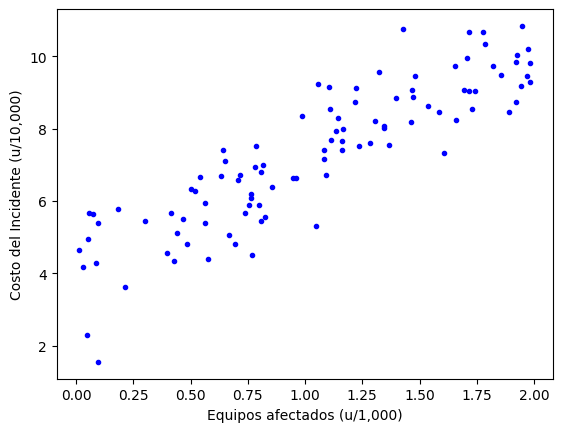

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

### 3.- Modificación del DataSet

In [23]:
import pandas as pd

data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.344380,8.062008
1,1.778877,10.677994
2,0.300420,5.437987
3,0.058601,5.661397
4,1.892332,8.457729
5,1.089723,6.705985
6,1.983956,9.279067
7,0.429046,4.334937
8,1.585240,8.458130
9,1.160856,7.656192


In [24]:
# Escalando el número de Equipos Afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)

# Escalado del costo 
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,No_Equipos_Afectados,Costo
0,1344,80620
1,1778,106779
2,300,54379
3,58,56613
4,1892,84577
5,1089,67059
6,1983,92790
7,429,43349
8,1585,84581
9,1160,76561


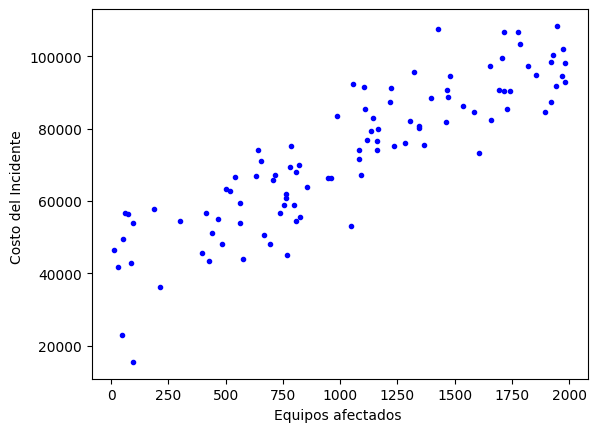

In [25]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados ")
plt.ylabel("Costo del Incidente ")
plt.show()

## 4.- Construcción del Modelo

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Construcción del Modelo y ajuste de la función de Hipótesis 
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Obetencion Theta 0

lin_reg.intercept_

np.float64(41082.23630596566)

In [29]:
# Parametro Theta 1
lin_reg.coef_

array([30.36856618])

In [30]:
# Prediccion para el valor mínimo y máximo del DataSet de entrenamiento
x_min_max = np.array([[df['No_Equipos_Afectados'].min()],[df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

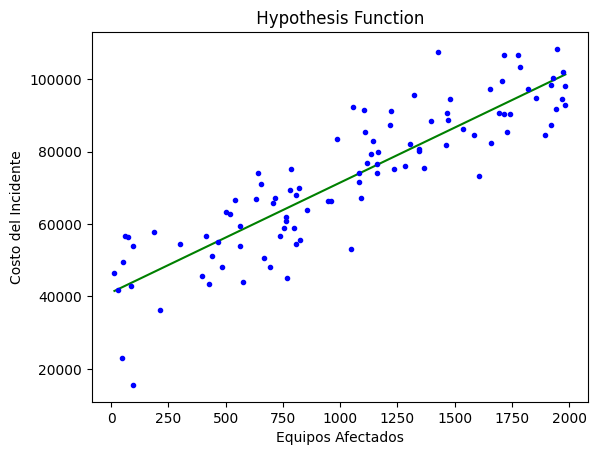

In [31]:
# Representacion gráfica de la función de Hipótesis generada
# Datos de la gráfica
plt.title(" Hypothesis Function ")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")

# Gráficacion de los datos y función 
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.show()

## 5.- Predicción de nuevos ejemplos

In [32]:
x_new = np.array([[3000]]) #1500 EQUIPOS AFECTADOS

# Prediccioón del costo que tendria el indidente 
costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(costo[0]))

El costo del incidente seria: $ 132187


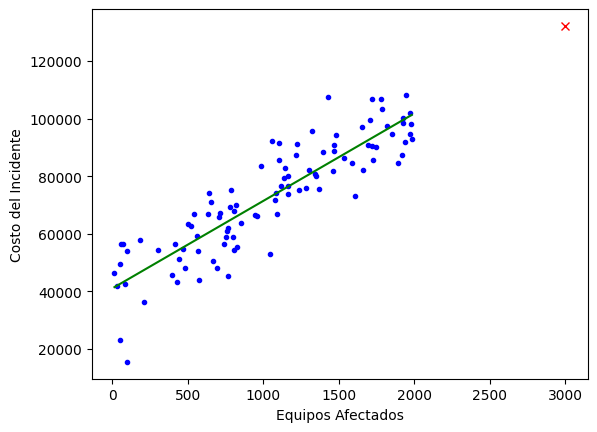

In [33]:
plt.plot(df['No_Equipos_Afectados'],df['Costo'], 'b.')
plt.plot(x_min_max, y_train_pred, 'g-' )
plt.plot(x_new, costo, "rx")

plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()